***
#VARSHITH REDDY
#E22CSEU1104
#B37
***

In [1]:
import cv2
import numpy as np

image_path = '/content/car.jpeg'

image = cv2.imread(image_path)

In [2]:
height, width, channels = image.shape
print(f"Image size: Width={width}, Height={height}, Channels={channels}")

Image size: Width=288, Height=180, Channels=3


In [3]:
total_pixels = height * width
print(f"Total number of pixels: {total_pixels}")

Total number of pixels: 51840


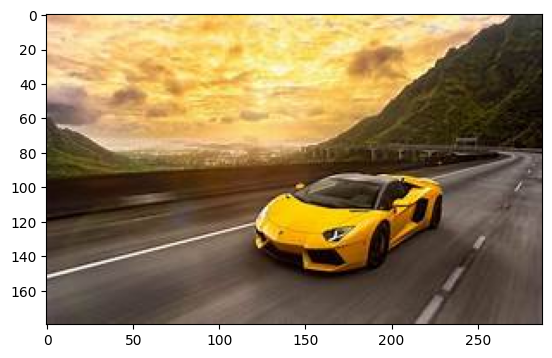

In [4]:
import matplotlib.pyplot as plt

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)

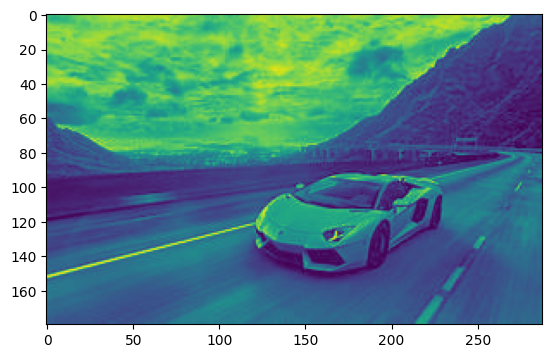

In [5]:
from google.colab.patches import cv2_imshow

grayscale_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(grayscale_image)

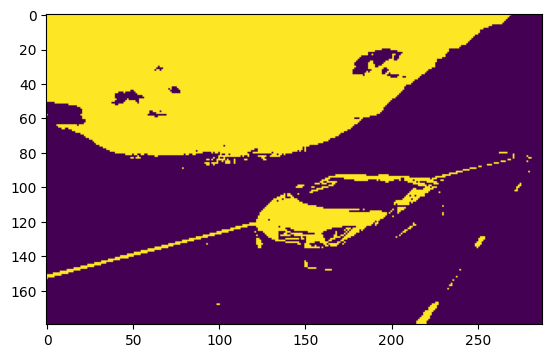

In [6]:
threshold_value = 128
a, binary_image = cv2.threshold(grayscale_image, threshold_value, 255, cv2.THRESH_BINARY)
#cv2_imshow(binary_image)
plt.imshow(binary_image)

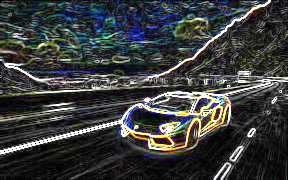

In [7]:
from scipy.ndimage import convolve
import numpy as np

# Sobel Operator
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
sobel_combined = cv2.magnitude(sobel_x, sobel_y)

# plt.figure(figsize=(12, 10))

# plt.subplot(2, 2, 1)
cv2_imshow(sobel_combined)
#plt.imshow(sobel_combined)

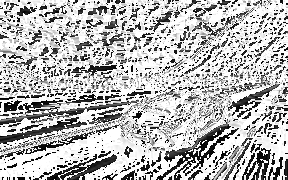

In [8]:
# Prewitt Operator
kernel_prewitt_x = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
kernel_prewitt_y = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
prewitt_x = convolve(grayscale_image, kernel_prewitt_x)
prewitt_y = convolve(grayscale_image, kernel_prewitt_y)
prewitt_combined = np.hypot(prewitt_x, prewitt_y)

cv2_imshow(prewitt_combined)

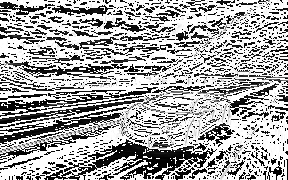

In [9]:
    # Roberts Cross Operator
kernel_roberts_x = np.array([[1, 0], [0, -1]])
kernel_roberts_y = np.array([[0, 1], [-1, 0]])
roberts_x = convolve(grayscale_image, kernel_roberts_x)
roberts_y = convolve(grayscale_image, kernel_roberts_y)
roberts_combined = np.hypot(roberts_x, roberts_y)

cv2_imshow(roberts_combined)

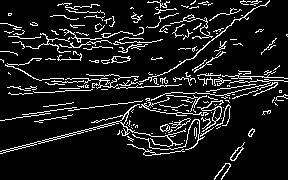

In [10]:
    # Canny Edge Detector
canny_edges = cv2.Canny(image, 100, 200)

cv2_imshow(canny_edges)

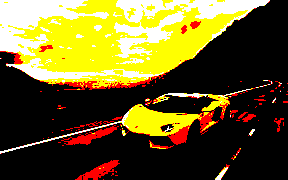

In [12]:
_, global_thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
cv2_imshow(global_thresh)

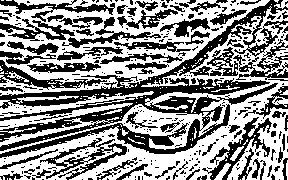

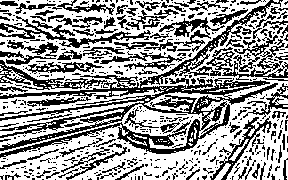

In [11]:
adaptive_thresh_mean = cv2.adaptiveThreshold(grayscale_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
cv2_imshow(adaptive_thresh_mean)
adaptive_thresh_gaussian = cv2.adaptiveThreshold(grayscale_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2 )
cv2_imshow(adaptive_thresh_gaussian)


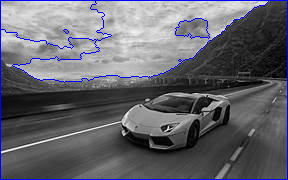

In [13]:
color_image = cv2.cvtColor(grayscale_image, cv2.COLOR_GRAY2BGR)

    # Apply Otsu's threshold to get the foreground
_, thresh = cv2.threshold(grayscale_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Distance transform
dist_transform = cv2.distanceTransform(thresh, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

    # Find the background
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(thresh, sure_fg)

    # Marker labelling
_, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0

    # Apply Watershed
markers = cv2.watershed(color_image, markers)
color_image[markers == -1] = [255, 0, 0]

cv2_imshow(color_image)
